<center><h1>ML Lab: Logistic Regression</h1></center>
<center><h2>Arush Sharma 16bce1127</h2></center>

<p>In this lab experiment, I am going to applying Logistic Regression firstly on seeds dataset. I will be applying various types of solvers and compare their performances. Then I will be applying it on the chosen dataset</p>

<h4>Importing Libraries</h4>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4>Loading the dataset</h4>

In [164]:
data=pd.read_csv("seeds.csv")
print(list(data))

['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'kgroove', 'class']


<h4>Choosing the value of X and y</h4>

In [165]:
from sklearn.linear_model import LogisticRegression
X=data[['area','perimeter','compactness','length','width','asymmetry','kgroove']]
y=data['class']

In [166]:
from sklearn.preprocessing import StandardScaler

<h4>Splitting the data into 80:20 Train:Test Split</h4>

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)

<h4>In this experiment, I have compared the performance of various solvers included in sklearn logistic regression.<br/> I will be comparing lbfgs, newton-cg, liblinear solver based on their performace on seeds dataset</h4> 

In [168]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("In case of lbfgs")
print("The confusion matrix is")
print(confusion_matrix(y_test, y_pred))
print("\nThe accuracy is")
print(accuracy_score(y_test, y_pred))

In case of lbfgs
The confusion matrix is
[[20  0  0]
 [ 0  9  0]
 [ 0  0 13]]

The accuracy is
1.0


In [169]:
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("In case of newton-cg")
print("The confusion matrix is")
print(confusion_matrix(y_test, y_pred))
print("\nThe accuracy is")
print(accuracy_score(y_test, y_pred))


In case of newton-cg
The confusion matrix is
[[19  1  0]
 [ 0  9  0]
 [ 0  0 13]]

The accuracy is
0.9761904761904762


In [170]:
clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("In case of liblinear")
print("The confusion matrix is")
print(confusion_matrix(y_test, y_pred))
print("\nThe accuracy is")
print(accuracy_score(y_test, y_pred))

In case of liblinear
The confusion matrix is
[[19  1  0]
 [ 0  9  0]
 [ 0  0 13]]

The accuracy is
0.9761904761904762


<h4>We see that lbfgs solver is best among the tested solvers, liblinear and newton-cg performs similarly</h4>

<center><h2>Part II: Implementation on my dataset</h2></center>

<h4> I will be working on the dataset which I have chosen for lab, i.e. Melbourne Housing Dataset</h4>

In [171]:
housing_data=pd.read_csv("Preprocessed_datasets\\Housing-data.csv")

<h4>Making the regionname to be either 0 or 1 to make two linearly seperable classes</h4>

In [172]:
X=housing_data['Postcode']
y=housing_data['Regionname'].copy()

from sklearn.linear_model import Perceptron

for i in range(len(y)):
    if(y[i]=='Eastern Metropolitan'):
        y[i]='0'
    elif(y[i]=='Eastern Victoria'):
        y[i]='0'
    elif(y[i]=='Northern Metropolitan'):
        y[i]='0'
    elif(y[i]=='Northern Victoria'):
        y[i]='0'
    elif(y[i]=='South-Eastern Metropolitan'):
        y[i]='1'
    elif(y[i]=='Southern Metropolitan'):
        y[i]='1'
    elif(y[i]=='Western Metropolitan'):
        y[i]='1'
    elif(y[i]=='Western Victoria'):
        y[i]='1'

ppn2 = Perceptron(max_iter=40, eta0=0.01, random_state=0)
 

<h4>Fitting the Logistic Regression on chosen dataset</h4>

In [173]:
x=[]
print(np.shape(y))
for i in range(len(y)):
    x.append([int(X[i]),int(y[i])])
x=np.array(x)
clf.fit(x, y)

(17659,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h4> Visualizing the decision boundary</h4>

In [174]:
import numpy as np
from matplotlib.colors import ListedColormap
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1

In [175]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

In [177]:
Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

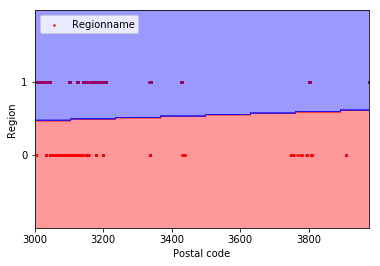

In [178]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.scatter(housing_data['Postcode'],y,s=2,color='red')
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Postal code')
plt.ylabel('Region')
plt.legend(loc='upper left')

<h4>Inference: We see that the Logistic Regression classifier has classified correctly. The decision boundary is in the middle of the 0 and 1 which is as expected.<br/>We also note that the classification by linear regression on this dataset is much better than that by the linear perceptron.</h4> 